ПРАКТИКУМ ПО ПРОГРАММИРОВАНИЮ, 1 курс, второй семестр, проект 2

Воробьев Андрей Дмитриевич

ТРПО24-3


Реализовать API, которое позволяет генерировать, преобразовывать и визуализировать последовательность плоских полигонов, представленных в виде картежа картежей (например: ((0,0), (0,1), (1,1), (1,0)) — представление для квадрата). Последовательности представлений полигонов представляют собой итераторы (далее: последовательности полигонов). Решать задачи с использованием функционального стиля программирования, в том числе активно использовать функции из модуля itertools и functools.

№ 1

Реализовать функцию визуализации последовательности полигонов, представленной в виде итератора (например, можно использовать визуализацию с помощью библиотеки matplotlib).

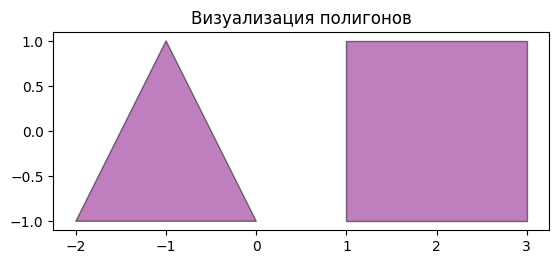

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

def visualize_polygons(polygons):
    """
    Визуализирует последовательность полигонов на графике с оптимизированными настройками.

    Аргументы:
        polygons (list): Список кортежей, каждый из которых содержит координаты вершин
                        полигона в формате ((x1, y1), (x2, y2), ...).
    """
    # Создаем фигуру и оси один раз для эффективности
    fig, ax = plt.subplots()

    # Создаем коллекцию полигонов в один шаг для оптимизации
    # Используем списковое включение для создания объектов Polygon
    collection = PatchCollection(
        [Polygon(coords) for coords in polygons],
        edgecolor='black',  # Цвет контура полигонов
        linewidth=1,        # Толщина контура
        facecolor='purple', # Цвет заливки полигонов
        alpha=0.5           # Легкая прозрачность для перекрывающихся полигонов
    )

    # Добавляем коллекцию на график
    ax.add_collection(collection)

    # Устанавливаем равное соотношение осей, чтобы избежать искажений
    ax.set_aspect('equal')

    # Автоматически подстраиваем границы графика под все полигоны
    ax.autoscale_view()

    # Устанавливаем заголовок графика
    plt.title("Визуализация полигонов")

    # Отображаем график
    plt.show()

# Пример полигонов: квадрат и треугольник
polygons = [
    ((1, -1), (3, -1), (3, 1), (1, 1)),  # Вершины квадрата
    ((0, -1), (-2, -1), (-1, 1))         # Вершины треугольника
]

# Вызываем функцию визуализации
visualize_polygons(polygons)

№ 2

Реализовать функции, генерирующие бесконечную последовательность непересекающихся полигонов с различающимися координатами (например, «ленту», см. рис. 2): прямоугольников (gen_rectangle);
треугольников (gen_triangle);

правильных шестиугольников (gen_hexagon).

с помощью данных функций используя функции из модуля itertools сгенерировать семь фигур, включающих как прямоугольники, так и треугольники и шестиугольники, визуализировать результат.

ПРЯМОУГОЛЬНИКИ

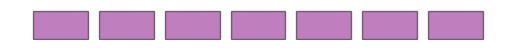

In [ ]:
import matplotlib.pyplot as plt
from itertools import islice

def gen_rectangle(start_x=0, start_y=0, width=1, height=1, step=1.5):
    """
    Генерирует последовательность прямоугольников с заданными параметрами.

    Аргументы:
        start_x (float): Начальная координата x левого нижнего угла.
        start_y (float): Начальная координата y левого нижнего угла.
        width (float): Ширина прямоугольника.
        height (float): Высота прямоугольника.
        step (float): Шаг смещения по оси x (в долях ширины).

    Возвращает:
        Iterator: Кортеж координат вершин прямоугольника ((x1, y1), ...).
    """
    x = start_x
    while True:
        # Формируем координаты четырех вершин прямоугольника
        yield (
            (x, start_y),
            (x + width, start_y),
            (x + width, start_y + height),
            (x, start_y + height)
        )
        x += width * step  # Смещаем x на шаг, умноженный на ширину

def plot_polygons(polygon_iter, num_polygons=5):
    """
    Визуализирует указанное количество полигонов из итератора.

    Аргументы:
        polygon_iter (Iterator): Итератор, возвращающий координаты полигонов.
        num_polygons (int): Количество полигонов для отображения.
    """
    # Создаем фигуру и оси один раз для эффективности
    fig, ax = plt.subplots()

    # Устанавливаем равное соотношение осей для корректного отображения
    ax.set_aspect('equal')

    # Отключаем отображение осей и меток для чистого графика
    ax.axis('off')

    # Извлекаем указанное количество полигонов из итератора
    for polygon in islice(polygon_iter, num_polygons):
        # Разделяем координаты на x и y для построения
        x_coords, y_coords = zip(*polygon)
        # Рисуем полигон с фиолетовой заливкой и черным контуром
        ax.fill(x_coords, y_coords, facecolor='purple', edgecolor='black', linewidth=1, alpha=0.5)

    # Автоматически подстраиваем границы под содержимое
    ax.autoscale_view()

    # Отображаем график
    plt.show()

# Создаем генератор прямоугольников с заданными параметрами
rect_gen = gen_rectangle(width=2, height=1, step=1.2)

# Визуализируем 7 прямоугольников
plot_polygons(rect_gen, num_polygons=7)

ТРЕУГОЛЬНИКИ

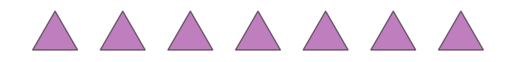

In [ ]:
import math
from itertools import islice
import matplotlib.pyplot as plt

def gen_triangle(start_x=0, start_y=0, size=1, step=2.0):
    """
    Генерирует последовательность равносторонних треугольников с заданными параметрами.

    Аргументы:
        start_x (float): Начальная координата x нижней левой вершины.
        start_y (float): Начальная координата y нижней левой вершины.
        size (float): Длина стороны треугольника.
        step (float): Шаг смещения по оси x (в долях размера стороны).

    Возвращает:
        Iterator: Список координат вершин треугольника [(x1, y1), (x2, y2), (x3, y3)].
    """
    x = start_x
    # Высота равностороннего треугольника: size * sqrt(3)/2
    h = size * math.sqrt(3) / 2
    while True:
        # Формируем координаты трех вершин треугольника
        yield [
            (x, start_y),               # Нижняя левая вершина
            (x + size, start_y),        # Нижняя правая вершина
            (x + size / 2, start_y + h) # Верхняя вершина
        ]
        x += size * step  # Смещаем x на шаг, умноженный на размер стороны

def plot_triangles(num=7, size=1.2, step=1.5):
    """
    Визуализирует указанное количество треугольников из генератора.

    Аргументы:
        num (int): Количество треуголников для отображения.
        size (float): Длина стороны треугольника.
        step (float): Шаг смещения по оси x.
    """
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.axis('off')
    tri_gen = gen_triangle(size=size, step=step)

    for tri in islice(tri_gen, num):
        x, y = zip(*tri)
        ax.fill(x, y, facecolor='purple', edgecolor='black', linewidth=1, alpha=0.5)

    ax.autoscale_view()
    plt.show()

# Визуализируем 7 треугольников с размером стороны 1.2 и шагом 1.5
plot_triangles(num=7, size=1.2, step=1.5)

ШЕСТИУГОЛЬНИКИ

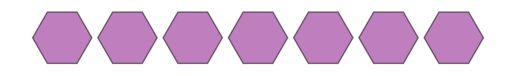

In [ ]:
import math
from itertools import islice
import matplotlib.pyplot as plt

def gen_hexagon(start_x=0, start_y=0, size=1, step=2.5):
    """
    Генерирует последовательность правильных шестиугольников с заданными параметрами.

    Аргументы:
        start_x (float): Начальная координата x центра шестиугольника.
        start_y (float): Начальная координата y центра шестиугольника.
        size (float): Радиус (расстояние от центра до вершины).
        step (float): Шаг смещения по оси x (в долях размера).

    Возвращает:
        Iterator: Список координат шести вершин шестиугольника [(x1, y1), ...].
    """
    x = start_x
    # Предвычисляем углы для шести вершин (0°, 60°, 120°, 180°, 240°, 300°)
    angles = [math.radians(60 * i) for i in range(6)]
    while True:
        # Формируем координаты вершин шестиугольника
        yield [(x + size * math.cos(angle), start_y + size * math.sin(angle)) for angle in angles]
        x += size * step  # Смещаем x на шаг, умноженный на размер

def plot_hexagons(num=7, size=0.8, step=2.2):
    """
    Визуализирует указанное количество шестиугольников из генератора.

    Аргументы:
        num (int): Количество шестиугольников для отображения.
        size (float): Радиус шестиугольника.
        step (float): Шаг смещения по оси x.
    """

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.axis('off')
    hex_gen = gen_hexagon(size=size, step=step)

    for hexagon in islice(hex_gen, num):
        x, y = zip(*hexagon)
        ax.fill(x, y, facecolor='purple', edgecolor='black', linewidth=1, alpha=0.5)

    ax.autoscale_view()
    plt.show()

# Визуализируем 7 шестиугольников с радиусом 0.8 и шагом 2.2
plot_hexagons(num=7, size=0.8, step=2.2)

ВСЕ ПОДРЯД

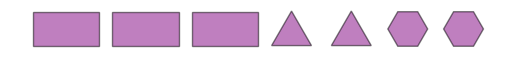

In [105]:
import math
from itertools import islice
import matplotlib.pyplot as plt

def plot_shapes():
    """
    Визуализирует строку из 3 прямоугольников, 2 треугольников и 2 шестиугольников,
    расположенных последовательно по горизонтали.
    """

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.axis('off')

    # 1. Генерируем и рисуем 3 прямоугольника
    rect_gen = gen_rectangle(start_x=0, width=2, height=1, step=1.2)
    for rect in islice(rect_gen, 3):
        x, y = zip(*rect)
        ax.fill(x, y, facecolor='purple', edgecolor='black', linewidth=1, alpha=0.5)

    # 2. Генерируем и рисуем 2 треугольника
    tri_gen = gen_triangle(start_x=7.2, size=1.2, step=1.5)
    for tri in islice(tri_gen, 2):
        x, y = zip(*tri)
        ax.fill(x, y, facecolor='purple', edgecolor='black', linewidth=1, alpha=0.5)

    # 3. Генерируем и рисуем 2 шестиугольника
    hex_gen = gen_hexagon(start_x=11.3,start_y=0.5, size=0.6, step=2.8)
    for hexagon in islice(hex_gen, 2):
        x, y = zip(*hexagon)
        ax.fill(x, y, facecolor='purple', edgecolor='black', linewidth=1, alpha=0.5)

    # Автоматически подстраиваем границы под содержимое
    ax.autoscale_view()

    # Отображаем график
    plt.show()

# Вызываем функцию для визуализации
plot_shapes()

№3

Реализовать операции:
параллельный перенос (tr_translate);

поворот (tr_rotate);

симметрия (tr_symmetry);

гомотетия (tr_homothety);

которые можно применить к последовательности полигонов с помощью функции map.

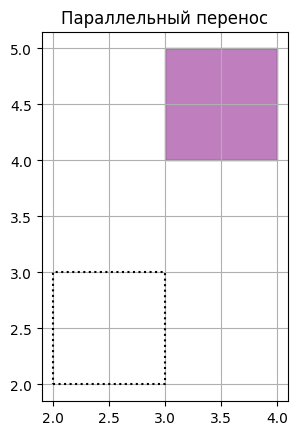

In [ ]:
import matplotlib.pyplot as plt
import math

# --- Функции преобразований ---

def tr_translate(dx, dy):
    """
    Создает функцию для параллельного переноса полигона на (dx, dy).

    Аргументы:
        dx (float): Смещение по оси x.
        dy (float): Смещение по оси y.

    Возвращает:
        function: Функция, преобразующая координаты полигона.
    """
    return lambda p: [(x + dx, y + dy) for x, y in p]

def tr_rotate(angle, center=(0, 0)):
    """
    Создает функцию для поворота полигона на заданный угол вокруг центра.

    Аргументы:
        angle (float): Угол поворота в радианах.
        center (tuple): Координаты центра поворота (cx, cy).

    Возвращает:
        function: Функция, преобразующая координаты полигона.
    """
    cx, cy = center
    cos_a, sin_a = math.cos(angle), math.sin(angle)
    return lambda p: [
        (
            cx + (x - cx) * cos_a - (y - cy) * sin_a,
            cy + (x - cx) * sin_a + (y - cy) * cos_a
        )
        for x, y in p
    ]

def tr_symmetry(axis='x'):
    """
    Создает функцию для симметрии полигона относительно оси или начала координат.

    Аргументы:
        axis (str): Ось симметрии ('x', 'y', 'origin').

    Возвращает:
        function: Функция, преобразующая координаты полигона.

    Исключения:
        ValueError: Если axis не 'x', 'y' или 'origin'.
    """
    if axis not in ('x', 'y', 'origin'):
        raise ValueError("Нет такой оси, окройте учебник по матиматике.")
    return lambda p: [(-x if axis in ('y', 'origin') else x, -y if axis in ('x', 'origin') else y) for x, y in p]

def tr_homothety(k, center=(0, 0)):
    """
    Создает функцию для гомотетии полигона с коэффициентом k относительно центра.

    Аргументы:
        k (float): Коэффициент масштабирования.
        center (tuple): Координаты центра гомотетии (cx, cy).

    Возвращает:
        function: Функция, преобразующая координаты полигона.
    """
    cx, cy = center
    return lambda p: [((x - cx) * k + cx, (y - cy) * k + cy) for x, y in p]

# --- Функция визуализации ---

def plot_polygons(original, transformed, title):
    """
    Визуализирует исходные и преобразованные полигоны на одном графике.

    Аргументы:
        original (list): Список исходных полигонов, каждый в формате [(x1, y1), ...].
        transformed (list): Список преобразованных полигонов.
        title (str): Заголовок графика.
    """

    fig, ax = plt.subplots()
    ax.set_aspect('equal')

    # Отрисовываем полигоны
    for poly in original:
        # Закрываем полигон
        xs, ys = zip(*(poly + [poly[0]]))
        # Исходные полигоны рисуем точками
        ax.plot(xs, ys, linestyle=':', color='black')

    for poly in transformed:
        xs, ys = zip(*(poly + [poly[0]]))
        ax.fill(xs, ys, facecolor='purple', edgecolor='black', linewidth=1, alpha=0.5)

    ax.set_title(title)
    ax.autoscale_view()

    # Отображаем сетку
    ax.grid(True)
    plt.show()


# Исходный полигон квадрат
polygons = [
    [(2, 2), (3, 2), (3, 3), (2, 3)]    # Квадрат
]

# Применяем преобразования
translated = [tr_translate(1, 2)(p) for p in polygons]
rotated = [tr_rotate(math.pi / 6)(p) for p in polygons]
symmetric = [tr_symmetry('y')(p) for p in polygons]
scaled = [tr_homothety(1.2)(p) for p in polygons]

# Визуализируем результаты
plot_polygons(polygons, translated, "Параллельный перенос")




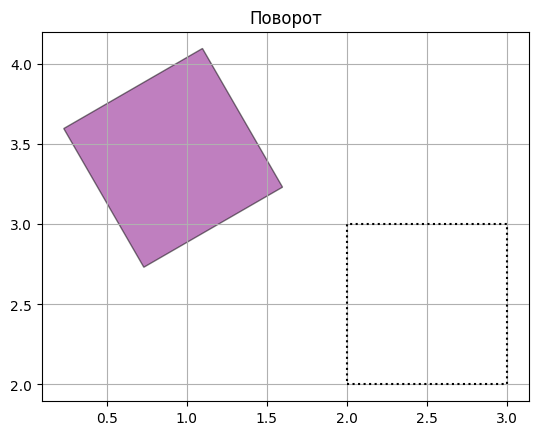

In [ ]:
plot_polygons(polygons, rotated, "Поворот")

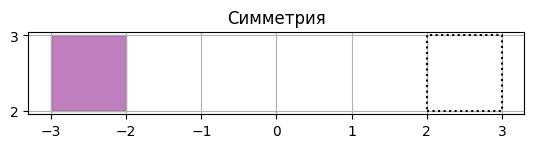

In [ ]:
plot_polygons(polygons, symmetric, "Симметрия")

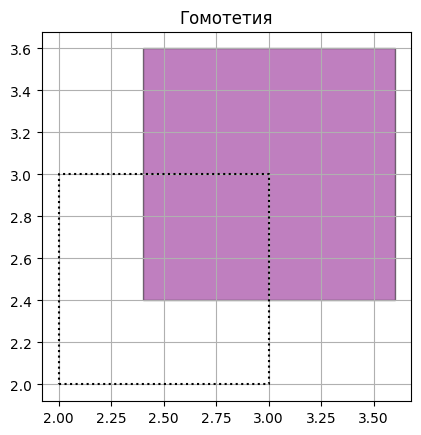

In [ ]:
plot_polygons(polygons, scaled, "Гомотетия")

№ 4

С помощью данных функций создать и визуализировать (рис. 3):
три параллельных «ленты» из последовательностей полигонов, расположенных под острым углом к оси абсцисс;

две пересекающихся «ленты» из последовательностей полигонов, пересекающихся не в начале координат;

две параллельных ленты треугольников, ориентированных симметрично друг к другу;

последовательность четырехугольников в разном масштабе, ограниченных двумя прямыми, пересекающимися в начале координат.

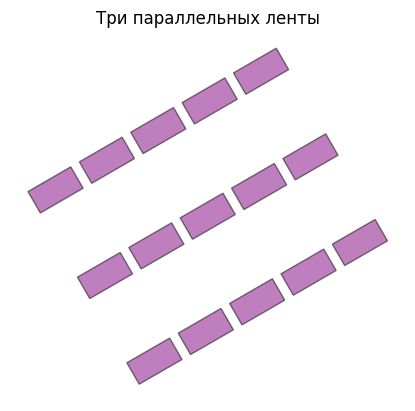

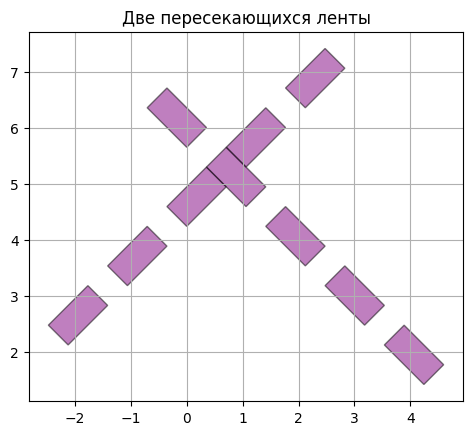

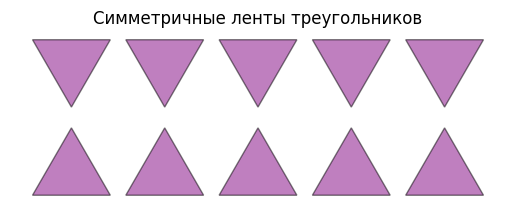

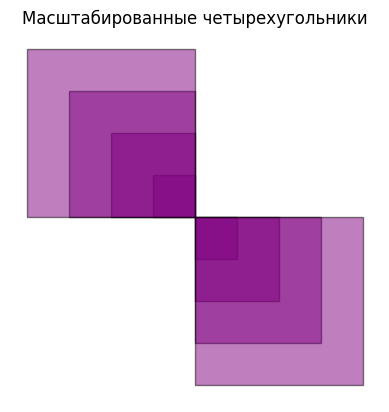

In [ ]:
import math
from itertools import islice
import matplotlib.pyplot as plt

# --- Функции визуализации ---

def plot_three_parallel_bands():
    """
    Визуализирует три параллельных ленты из прямоугольников под углом 30 градусов.
    """
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.axis('off')

    angle = math.radians(30)  # Угол поворота лент (30 градусов)

    # Создаем три ленты с вертикальным смещением
    for dy in [-2, 0, 2]:
        rect_gen = gen_rectangle(start_y=dy, width=1, height=0.5, step=1.2)
        for rect in islice(rect_gen, 5):
            # Применяем поворот
            rotated = tr_rotate(angle)(rect)
            x, y = zip(*rotated)
            ax.fill(x, y, facecolor='purple', edgecolor='black', linewidth=1, alpha=0.5)

    ax.autoscale_view()
    plt.title("Три параллельных ленты")
    plt.show()

def plot_two_intersecting_bands():
    """
    Визуализирует две пересекающихся ленты из прямоугольников, не в начале координат.
    """
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.grid(True)

    rect_gen1 = gen_rectangle(start_x=0, start_y=3, width=1, height=0.5, step=1.5)
    for rect in islice(rect_gen1, 5):
        rotated = tr_rotate(math.radians(45))(rect)
        x, y = zip(*rotated)
        ax.fill(x, y, facecolor='purple', edgecolor='black', linewidth=1, alpha=0.5)

    rect_gen2 = gen_rectangle(start_x=-5, start_y=4, width=1, height=0.5, step=1.5)
    for rect in islice(rect_gen2, 5):
        rotated = tr_rotate(math.radians(-45))(rect)
        x, y = zip(*rotated)
        ax.fill(x, y, facecolor='purple', edgecolor='black', linewidth=1, alpha=0.5)

    ax.autoscale_view()
    plt.title("Две пересекающихся ленты")
    plt.show()

def plot_symmetric_triangle_bands():
    """
    Визуализирует две симметричные ленты треугольников.
    """
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.axis('off')

    num_polygons = 5  # Количество треугольников в каждой ленте
    # Первая лента: треугольники наверху
    tri_gen1 = gen_triangle(start_y=-1, size=1, step=1.2)
    for tri in islice(tri_gen1, num_polygons):
        x, y = zip(*tri)
        ax.fill(x, y, facecolor='purple', edgecolor='black', linewidth=1, alpha=0.5)

    # Вторая лента: треугольники, отраженные относительно оси x
    tri_gen2 = gen_triangle(start_y=-1, size=1, step=1.2)
    for tri in islice(tri_gen2, num_polygons):
        symmetric = tr_symmetry('x')(tri)
        x, y = zip(*symmetric)
        ax.fill(x, y, facecolor='purple', edgecolor='black', linewidth=1, alpha=0.5)

    ax.autoscale_view()
    plt.title("Симметричные ленты треугольников")
    plt.show()

def plot_scaled_quads():
    """
    Визуализирует последовательность масштабированных четырехугольников,
    ограниченных двумя прямыми, пересекающимися в (0, 0).
    """
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.axis('off')

    # Базовый прямоугольник
    base_rect = [(0, 0), (1, 0), (1, 1), (0, 1)]
    scales = [0.5, 1, 1.5, 2]  # Разные коэффициенты масштабирования

    # Применяем гомотетию с разными масштабами
    for k in scales:
        scaled = tr_homothety(k)(base_rect)
        # Поворачиваем, чтобы вписать в сектор между y=x и y=-x
        rotated = tr_rotate(math.radians(270))(scaled)
        x, y = zip(*rotated)
        ax.fill(x, y, facecolor='purple', edgecolor='black', linewidth=1, alpha=0.5)

    for k in scales:
        scaled = tr_homothety(k)(base_rect)
        rotated = tr_rotate(math.radians(90))(scaled)
        x, y = zip(*rotated)
        ax.fill(x, y, facecolor='purple', edgecolor='black', linewidth=1, alpha=0.5)

    ax.autoscale_view()
    plt.title("Масштабированные четырехугольники")
    plt.show()

# --- Вызов функций ---

plot_three_parallel_bands()
plot_two_intersecting_bands()
plot_symmetric_triangle_bands()
plot_scaled_quads()

№ 5

Реализовать операции:

фильтрации фигур, являющихся выпуклыми многоугольниками (flt_convex_polygon); ✔

фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой (flt_angle_point); ✔

фильтрации фигур, имеющих площадь меньше заданной (flt_square); ✔

фильтрации фигур, имеющих кратчайшую сторону меньше заданного значения
(flt_short_side); ✔

фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) (flt_point_inside); ✔

фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника (flt_polygon_angles_inside); ✔




\

обязательная часть: 2 пункта

4 пункта — сложность 1

6 пунктов — сложность 2 ✔

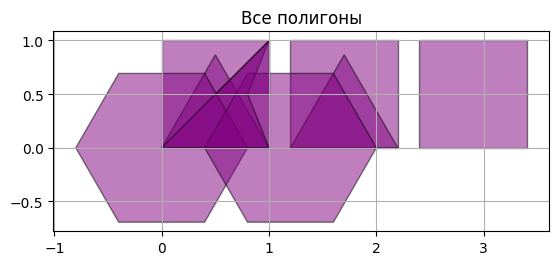

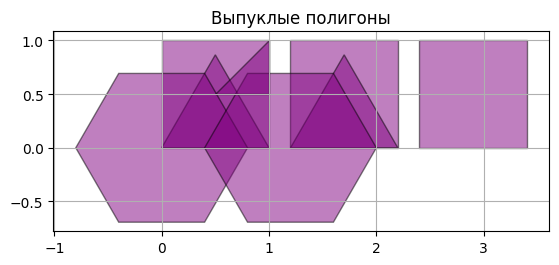

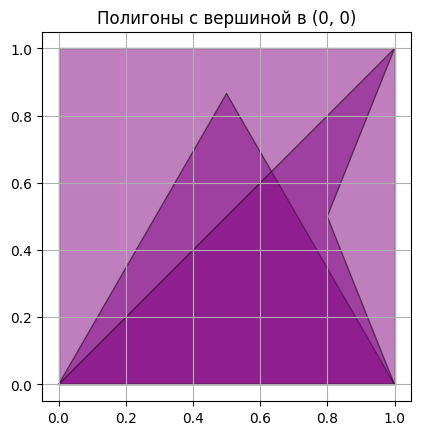

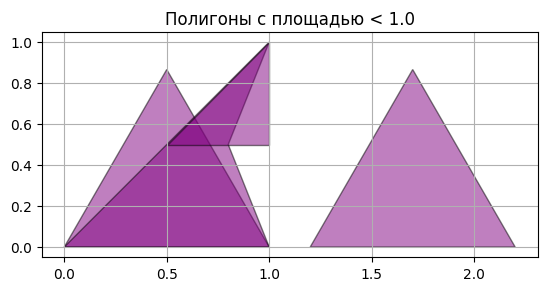

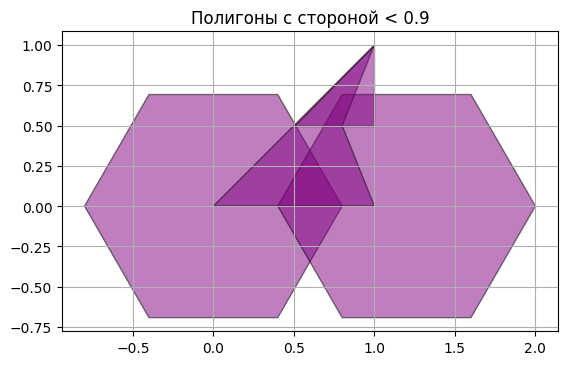

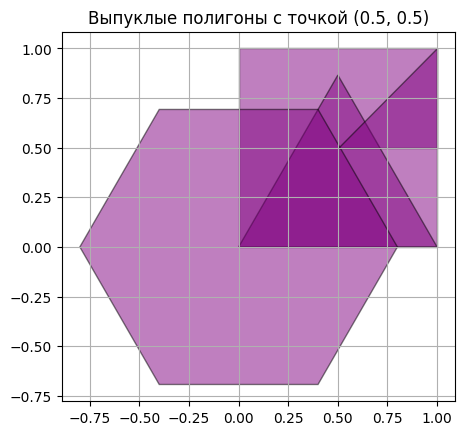

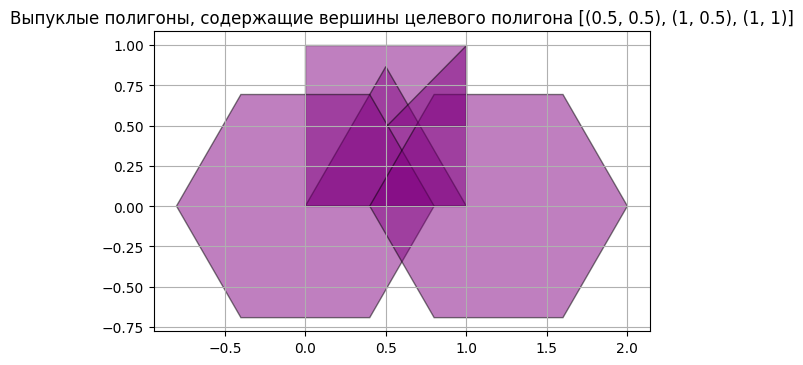

In [ ]:
import math
from itertools import islice
import matplotlib.pyplot as plt
import numpy as np

# --- Вспомогательные функции для фильтрации -------------------------------------------------------------------------------------------------------------

def is_convex(polygon):
    """
    Проверяет, является ли полигон выпуклым, анализируя ориентацию всех троек последовательных вершин.
    """
    n = len(polygon)
    if n < 3:
        return False
    signs = []
    for i in range(n):
        p1, p2, p3 = polygon[i], polygon[(i + 1) % n], polygon[(i + 2) % n]
        cross = (p2[0] - p1[0]) * (p3[1] - p2[1]) - (p2[1] - p1[1]) * (p3[0] - p2[0])
        signs.append(1 if cross > 0 else -1 if cross < 0 else 0)
    signs = [s for s in signs if s != 0]
    return len(set(signs)) <= 1 and signs

def polygon_area(polygon):
    """Вычисляет площадь полигона по формуле Гаусса."""
    n = len(polygon)
    if n < 3:
        return 0.0
    area = 0.0
    for i in range(n):
        j = (i + 1) % n
        area += polygon[i][0] * polygon[j][1]
        area -= polygon[j][0] * polygon[i][1]
    return abs(area) / 2.0

def shortest_side(polygon):
    """Находит длину кратчайшей стороны полигона."""
    n = len(polygon)
    if n < 2:
        return float('inf')
    min_length = float('inf')
    for i in range(n):
        x1, y1 = polygon[i]
        x2, y2 = polygon[(i + 1) % n]
        length = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        min_length = min(min_length, length)
    return min_length

def is_point_inside(polygon, point):
    """Проверяет, находится ли точка внутри выпуклого полигона (метод ray-casting)."""
    x, y = point
    n = len(polygon)
    inside = False
    for i in range(n):
        x1, y1 = polygon[i]
        x2, y2 = polygon[(i + 1) % n]
        if ((y1 > y) != (y2 > y)) and (x < (x2 - x1) * (y - y1) / (y2 - y1 + 1e-10) + x1):
            inside = not inside
    return inside

# --- Функции фильтрации -------------------------------------------------------------------------------------------------------------

def flt_convex_polygon(polygon):
    """Фильтрует полигоны, являющиеся выпуклыми."""
    return is_convex(polygon)

def flt_angle_point(polygon, point, eps=1e-6):
    """
    Фильтрует полигоны, у которых хотя бы одна вершина совпадает с заданной точкой.
    """
    px, py = point
    return any(abs(x - px) < eps and abs(y - py) < eps for x, y in polygon)

def flt_square(polygon, max_area):
    """Фильтрует полигоны с площадью меньше заданной."""
    return polygon_area(polygon) < max_area

def flt_short_side(polygon, min_length):
    """Фильтрует полигоны, у которых кратчайшая сторона короче заданной длины."""
    return shortest_side(polygon) < min_length

def flt_point_inside(polygon, point):
    """Фильтрует выпуклые полигоны, содержащие заданную точку внутри."""
    return is_convex(polygon) and is_point_inside(polygon, point)

def flt_polygon_angles_inside(polygon, target_polygon):
    """Фильтрует выпуклые полигоны, содержащие хотя бы одну вершину заданного полигона."""
    return is_convex(polygon) and any(is_point_inside(polygon, point) for point in target_polygon)

# --- функция визуализации -------------------------------------------------------------------------------------------------------------

def plot_filtered_polygons(polygons, title="Отфильтрованные полигоны"):
    """
    Визуализирует список полигонов.

    Аргументы:
        polygons (list): Список полигонов для отображения.
        title (str): Заголовок графика.
    """
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.grid(True)

    for poly in polygons:
        # Преобразуем poly в список, чтобы избежать TypeError при конкатенации
        poly_list = list(poly)
        # Закрываем полигон, добавляя первую точку в конец
        closed_poly = poly_list + [poly_list[0]]
        x, y = zip(*closed_poly)
        ax.fill(x, y, facecolor='purple', edgecolor='black', linewidth=1, alpha=0.5)

    ax.autoscale_view()
    plt.title(title)
    plt.show()

# --- Тестирование фильтров -------------------------------------------------------------------------------------------------------------

        # Создаем смешанную последовательность полигонов
polygons = [
    *islice(gen_rectangle(width=1, height=1, step=1.2), 3),  # 3 прямоугольника
    *islice(gen_triangle(size=1, step=1.2), 2),              # 2 треугольника
    *islice(gen_hexagon(size=0.8, step=1.5), 2),             # 2 шестиугольника
    [(0, 0), (1, 0), (0.8, 0.5), (1, 1)],                 # Невыпуклый полигон
    [(0.5, 0.5), (1, 0.5), (1, 1)]                          # Заданный полигон
        ]
polygons = list(polygons)  # Преобразуем в список для повторного использования
plot_filtered_polygons(polygons, "Все полигоны")

        # 1. Фильтрация выпуклых полигонов
convex_polygons = list(filter(flt_convex_polygon, polygons))
plot_filtered_polygons(convex_polygons, "Выпуклые полигоны")

        # 2. Фильтрация полигонов с вершиной в точке (0, 0)
point = (0, 0)
angle_point_polygons = list(filter(lambda p: flt_angle_point(p, point), polygons))
plot_filtered_polygons(angle_point_polygons, f"Полигоны с вершиной в {point}")

        # 3. Фильтрация полигонов с площадью меньше 1
max_area = 1.0
small_area_polygons = list(filter(lambda p: flt_square(p, max_area), polygons))
plot_filtered_polygons(small_area_polygons, f"Полигоны с площадью < {max_area}")

        # 4. Фильтрация полигонов с кратчайшей стороной короче 0.9
min_length = 0.9
short_side_polygons = list(filter(lambda p: flt_short_side(p, min_length), polygons))
plot_filtered_polygons(short_side_polygons, f"Полигоны с стороной < {min_length}")

        # 5. Фильтрация выпуклых полигонов, содержащих точку (0.5, 0.5)
point_inside = (0.5, 0.5)
point_inside_polygons = list(filter(lambda p: flt_point_inside(p, point_inside), polygons))
plot_filtered_polygons(point_inside_polygons, f"Выпуклые полигоны с точкой {point_inside}")

        # 6. Фильтрация выпуклых полигонов, содержащих вершины целевого полигона
target_polygon = [(0.5, 0.5), (1, 0.5), (1, 1)]
angles_inside_polygons = list(filter(lambda p: flt_polygon_angles_inside(p, target_polygon), polygons))
plot_filtered_polygons(angles_inside_polygons, "Выпуклые полигоны, содержащие вершины целевого полигона [(0.5, 0.5), (1, 0.5), (1, 1)]")

№6

С помощью данных функций реализовать и визуализировать:
фильтрацию фигур, созданных в рамках пункта 4.4; подобрать параметры так, чтобы на выходе было получено шесть фигур;

используя функции генерации из п. 2 и операции из п. 3, создать не менее 15 фигур, которые имеют различный масштаб, и выбрать из них (подбором параметра фильтрации) не более четырех фигур, имеющих кратчайшую сторону меньше заданного значения; ✔

используя функции генерации из п. 2 и операции из п. 3, создать не менее 15 фигур имеющих множество пересечений и обеспечить фильтрацию пересекающихся фигур.

обязательная часть: 1 пункт ✔

3 пункта — сложность 1

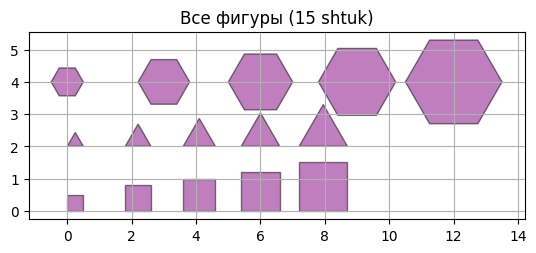

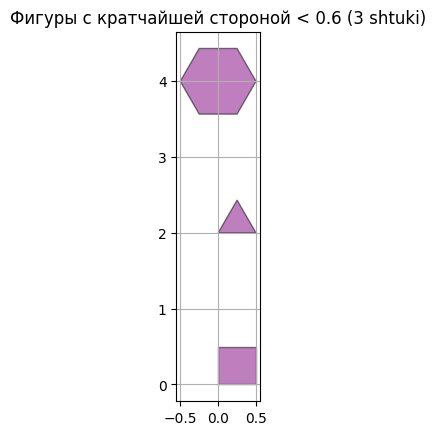

In [107]:
import math
from itertools import islice
import matplotlib.pyplot as plt

# --- Визуализация -------------------------------------------------------------------------------------------------------------

def plot_polygons(polygons, title="Полигоны"):
    """
    Визуализирует список полигонов с заданным заголовком.

    Аргументы:
        polygons (list): Список полигонов для отображения.
        title (str): Заголовок графика.
    """
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.grid(True)

    for poly in polygons:
        # Преобразуем poly в список для корректной конкатенации
        poly_list = list(poly)
        closed_poly = poly_list + [poly_list[0]]  # Закрываем полигон
        x, y = zip(*closed_poly)
        ax.fill(x, y, facecolor='purple', edgecolor='black', linewidth=1, alpha=0.5)

    ax.autoscale_view()
    plt.title(title)
    plt.show()

# --- Основная логика -------------------------------------------------------------------------------------------------------------

# Создаем базовые фигуры
base_rect = next(gen_rectangle(width=1, height=1))  # Базовый прямоугольник
base_tri = next(gen_triangle(size=1))               # Базовый треугольник
base_hex = next(gen_hexagon(size=1))               # Базовый шестиугольник

# Масштабы для фигур
scales = [0.5, 0.8, 1.0, 1.2, 1.5]  # Разные коэффициенты масштабирования

# Список для хранения всех фигур
polygons = []

# Генерируем 5 прямоугольников с разным масштабом
for i, k in enumerate(scales):
    scaled = tr_homothety(k)(base_rect)  # Масштабируем
    # Смещаем, чтобы фигуры не перекрывались
    translated = tr_translate(i * 1.8, 0)(scaled)
    polygons.append(translated)

# Генерируем 5 треугольников с разным масштабом
for i, k in enumerate(scales):
    scaled = tr_homothety(k)(base_tri)
    translated = tr_translate(i * 1.8, 2)(scaled)  # Смещаем по y
    polygons.append(translated)

# Генерируем 5 шестиугольников с разным масштабом
for i, k in enumerate(scales):
    scaled = tr_homothety(k)(base_hex)
    translated = tr_translate(i * 3, 4)(scaled)  # Смещаем по y
    polygons.append(translated)

# Визуализируем все 15 фигур
plot_polygons(polygons, "Все фигуры (15 shtuk)")

# Фильтрация по кратчайшей стороне
min_length = 0.6
filtered_polygons = list(filter(lambda p: flt_short_side(p, min_length), polygons))
plot_polygons(filtered_polygons, f"Фигуры с кратчайшей стороной < {min_length} ({len(filtered_polygons)} shtuki)")

№7

Реализовать декораторы и продемонстрировать корректность их работы:
фильтрующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из п. 5: @flt_convex_polygon, @flt_angle_point, @flt_square, @flt_short_side, @flt_point_inside, @flt_polygon_angles_inside;

преобразующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из п. 3: @tr_translate, @tr_rotate, @tr_symmetry, @tr_homothety.

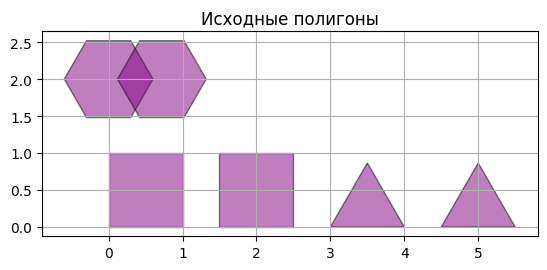

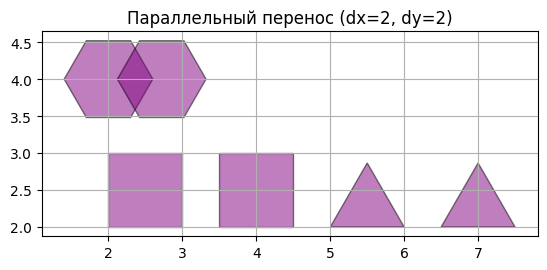

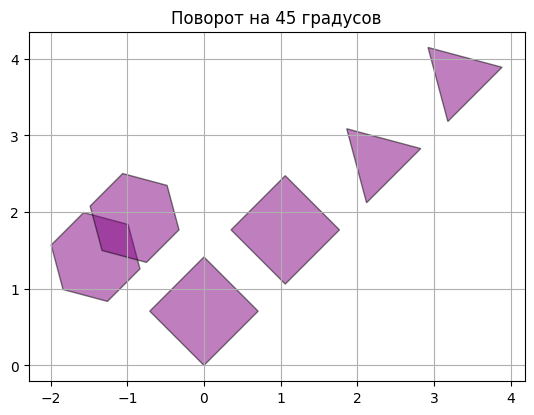

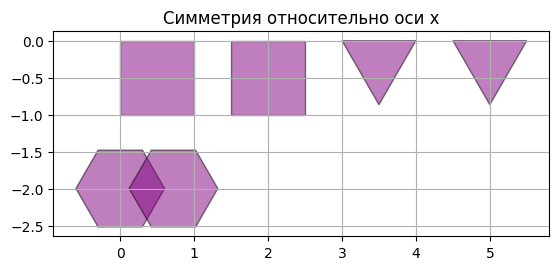

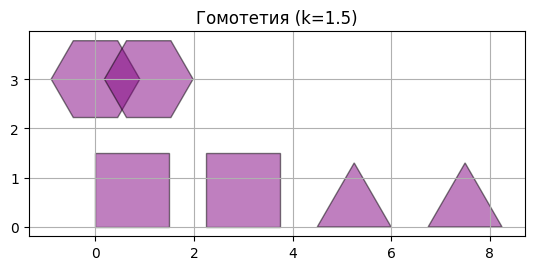

In [ ]:
import math
from itertools import islice
import matplotlib.pyplot as plt

# --- Декораторы для преобразований -------------------------------------------------------------------------------------------------------------

def tr_translate_decorator(dx, dy):
    """
    Декоратор, который применяет параллельный перенос ко всем полигонам в итераторе.

    Аргументы:
        dx (float): Смещение по оси x.
        dy (float): Смещение по оси y.

    Возвращает:
        function: Декоратор, который оборачивает функцию.
    """
    transform = tr_translate(dx, dy)
    def decorator(func):
        def wrapper(polygons, *args, **kwargs):
            # Применяем преобразование к каждому полигону в итераторе
            transformed_polygons = (transform(p) for p in polygons)
            return func(transformed_polygons, *args, **kwargs)
        return wrapper
    return decorator

def tr_rotate_decorator(angle, center=(0, 0)):
    """
    Декоратор, который применяет поворот ко всем полигонам в итераторе.

    Аргументы:
        angle (float): Угол поворота в радианах.
        center (tuple): Координаты центра поворота (cx, cy).

    Возвращает:
        function: Декоратор, который оборачивает функцию.
    """
    transform = tr_rotate(angle, center)
    def decorator(func):
        def wrapper(polygons, *args, **kwargs):
            transformed_polygons = (transform(p) for p in polygons)
            return func(transformed_polygons, *args, **kwargs)
        return wrapper
    return decorator

def tr_symmetry_decorator(axis='x'):
    """
    Декоратор, который применяет симметрию ко всем полигонам в итераторе.

    Аргументы:
        axis (str): Ось симметрии ('x', 'y', 'origin').

    Возвращает:
        function: Декоратор, который оборачивает функцию.
    """
    transform = tr_symmetry(axis)
    def decorator(func):
        def wrapper(polygons, *args, **kwargs):
            transformed_polygons = (transform(p) for p in polygons)
            return func(transformed_polygons, *args, **kwargs)
        return wrapper
    return decorator

def tr_homothety_decorator(k, center=(0, 0)):
    """
    Декоратор, который применяет гомотетию ко всем полигонам в итераторе.

    Аргументы:
        k (float): Коэффициент масштабирования.
        center (tuple): Координаты центра гомотетии (cx, cy).

    Возвращает:
        function: Декоратор, который оборачивает функцию.
    """
    transform = tr_homothety(k, center)
    def decorator(func):
        def wrapper(polygons, *args, **kwargs):
            transformed_polygons = (transform(p) for p in polygons)
            return func(transformed_polygons, *args, **kwargs)
        return wrapper
    return decorator

# --- Визуализация -------------------------------------------------------------------------------------------------------------

def plot_polygons(polygons, title="Полигоны"):
    """
    Визуализирует список полигонов с заданным заголовком.

    Аргументы:
        polygons (list): Список полигонов для отображения.
        title (str): Заголовок графика.
    """
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.grid(True)

    for poly in polygons:
        poly_list = list(poly)  # Преобразуем в список для конкатенации
        closed_poly = poly_list + [poly_list[0]]  # Закрываем полигон
        x, y = zip(*closed_poly)
        ax.fill(x, y, facecolor='purple', edgecolor='black', linewidth=1, alpha=0.5)

    ax.autoscale_view()
    plt.title(title)
    plt.show()

# --- Демонстрация работы декораторов -------------------------------------------------------------------------------------------------------------

def process_polygons(polygons):
    """
    Базовая функция, которая принимает итератор полигонов и преобразует его в список.

    Аргументы:
        polygons: Итератор полигонов.

    Возвращает:
        list: Список преобразованных полигонов.
    """
    return list(polygons)

# Функции с декораторами для каждого преобразования

@tr_translate_decorator(dx=2, dy=2)
def translate_polygons(polygons):
    """Применяет параллельный перенос (dx=2, dy=2) ко всем полигонам."""
    return process_polygons(polygons)

@tr_rotate_decorator(angle=math.radians(45))
def rotate_polygons(polygons):
    """Применяет поворот на 45 градусов ко всем полигонам."""
    return process_polygons(polygons)

@tr_symmetry_decorator(axis='x')
def symmetry_polygons(polygons):
    """Применяет симметрию относительно оси x ко всем полигонам."""
    return process_polygons(polygons)

@tr_homothety_decorator(k=1.5)
def homothety_polygons(polygons):
    """Применяет гомотетию с коэффициентом 1.5 ко всем полигонам."""
    return process_polygons(polygons)

# --- Основная логика и демонстрация -------------------------------------------------------------------------------------------------------------

# Создаем набор полигонов
polygons = [
    *islice(gen_rectangle(start_x=0, start_y=0, width=1, height=1, step=1.5), 2),  # 2 прямоугольника
    *islice(gen_triangle(start_x=3, start_y=0, size=1, step=1.5), 2),              # 2 треугольника
    *islice(gen_hexagon(start_x=0, start_y=2, size=0.6, step=1.2), 2),             # 2 шестиугольника
]
original_polygons = list(polygons)  # Сохраняем исходные полигоны

# Визуализируем исходные полигоны
plot_polygons(original_polygons, "Исходные полигоны")

# Применяем декораторы и визуализируем результаты
translated = translate_polygons(original_polygons)
plot_polygons(translated, "Параллельный перенос (dx=2, dy=2)")

rotated = rotate_polygons(original_polygons)
plot_polygons(rotated, "Поворот на 45 градусов")

symmetric = symmetry_polygons(original_polygons)
plot_polygons(symmetric, "Симметрия относительно оси x")

scaled = homothety_polygons(original_polygons)
plot_polygons(scaled, "Гомотетия (k=1.5)")

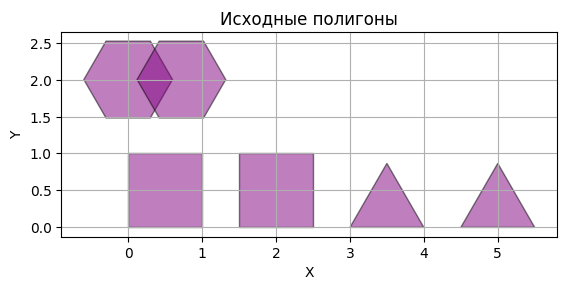

Ближайшая вершина к (0, 0): (0, 0), расстояние: 0.00


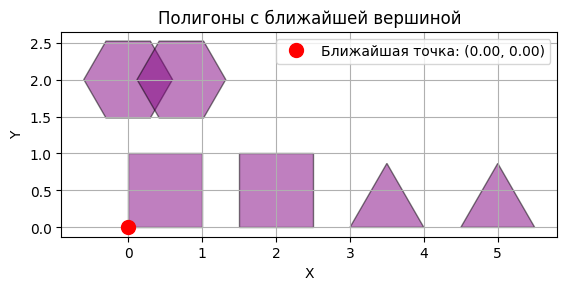

Самая длинная сторона: 1.00
Самая маленькая площадь: 0.43
Суммарный периметр: 21.20
Суммарная площадь: 4.74


In [ ]:
import math
from itertools import islice
from functools import reduce
import matplotlib.pyplot as plt

# --- Вспомогательные функции -------------------------------------------------------------------------------------------------------------

def distance_to_origin(point):
    """
    Вычисляет расстояние от точки до начала координат (0, 0).

    Аргументы:
        point (tuple): Координаты точки (x, y).

    Возвращает:
        float: Евклидово расстояние до (0, 0).
    """
    x, y = point
    return math.sqrt(x**2 + y**2)

def side_length(p1, p2):
    """
    Вычисляет длину стороны между двумя точками.

    Аргументы:
        p1, p2 (tuple): Координаты двух точек (x1, y1), (x2, y2).

    Возвращает:
        float: Длина стороны.
    """
    x1, y1 = p1
    x2, y2 = p2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def polygon_perimeter(polygon):
    """
    Вычисляет периметр полигона.

    Аргументы:
        polygon (list): Список координат вершин [(x1, y1), ...].

    Возвращает:
        float: Периметр полигона.
    """
    n = len(polygon)
    if n < 2:
        return 0.0
    perimeter = 0.0
    for i in range(n):
        perimeter += side_length(polygon[i], polygon[(i + 1) % n])
    return perimeter

def polygon_area(polygon):
    """
    Вычисляет площадь полигона по формуле Гаусса (shoelace formula).

    Аргументы:
        polygon (list): Список координат вершин [(x1, y1), ...].

    Возвращает:
        float: Площадь полигона (абсолютное значение).
    """
    n = len(polygon)
    if n < 3:
        return 0.0
    area = 0.0
    for i in range(n):
        j = (i + 1) % n
        area += polygon[i][0] * polygon[j][1]
        area -= polygon[j][0] * polygon[i][1]
    return abs(area) / 2.0

# --- Функции для reduce -------------------------------------------------------------------------------------------------------------

def agr_origin_nearest(acc, polygon):
    """
    Находит вершину, ближайшую к началу координат (0, 0), среди всех полигонов.

    Аргументы:
        acc (tuple): Накопленное значение: (точка, расстояние, полигон).
        polygon (list): Текущий полигон.

    Возвращает:
        tuple: (точка, расстояние, полигон) для ближайшей вершины.
    """
    # Начальное значение: (точка, расстояние, полигон)
    if acc is None:
        closest_point = min(polygon, key=distance_to_origin)
        return (closest_point, distance_to_origin(closest_point), polygon)

    # Сравниваем с текущим минимумом
    closest_point = min(polygon, key=distance_to_origin)
    dist = distance_to_origin(closest_point)
    if dist < acc[1]:
        return (closest_point, dist, polygon)
    return acc

def agr_max_side(acc, polygon):
    """
    Находит самую длинную сторону среди всех полигонов.

    Аргументы:
        acc (float): Накопленное значение (максимальная длина стороны).
        polygon (list): Текущий полигон.

    Возвращает:
        float: Максимальная длина стороны.
    """
    n = len(polygon)
    if n < 2:
        return acc if acc is not None else 0.0

    # Находим самую длинную сторону текущего полигона
    max_side = 0.0
    for i in range(n):
        length = side_length(polygon[i], polygon[(i + 1) % n])
        max_side = max(max_side, length)

    # Сравниваем с накопленным значением
    if acc is None:
        return max_side
    return max(acc, max_side)

def agr_min_area(acc, polygon):
    """
    Находит самую маленькую площадь среди всех полигонов.

    Аргументы:
        acc (float): Накопленное значение (минимальная площадь).
        polygon (list): Текущий полигон.

    Возвращает:
        float: Минимальная площадь.
    """
    area = polygon_area(polygon)
    if acc is None:
        return area
    return min(acc, area)

def agr_perimeter(acc, polygon):
    """
    Считает суммарный периметр всех полигонов.

    Аргументы:
        acc (float): Накопленное значение (суммарный периметр).
        polygon (list): Текущий полигон.

    Возвращает:
        float: Суммарный периметр.
    """
    perimeter = polygon_perimeter(polygon)
    if acc is None:
        return perimeter
    return acc + perimeter

def agr_area(acc, polygon):
    """
    Считает суммарную площадь всех полигонов.

    Аргументы:
        acc (float): Накопленное значение (суммарная площадь).
        polygon (list): Текущий полигон.

    Возвращает:
        float: Суммарная площадь.
    """
    area = polygon_area(polygon)
    if acc is None:
        return area
    return acc + area

# --- Визуализация ---

def plot_polygons(polygons, title="Полигоны", highlight_point=None):
    """
    Визуализирует список полигонов с заданным заголовком и выделяет точку, если указано.

    Аргументы:
        polygons (list): Список полигонов для отображения.
        title (str): Заголовок графика.
        highlight_point (tuple): Точка для выделения (x, y), если есть.
    """
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for poly in polygons:
        poly_list = list(poly)
        closed_poly = poly_list + [poly_list[0]]
        x, y = zip(*closed_poly)
        ax.fill(x, y, facecolor='purple', edgecolor='black', linewidth=1, alpha=0.5)

    if highlight_point:
        px, py = highlight_point
        ax.plot(px, py, 'ro', markersize=10, label=f'Ближайшая точка: ({px:.2f}, {py:.2f})')
        ax.legend()

    ax.autoscale_view()
    plt.title(title)
    plt.show()

# --- Демонстрация работы функций ----------------------------------------------------------------------------------------------------------------


# Создаем набор полигонов
polygons = [
    *islice(gen_rectangle(start_x=0, start_y=0, width=1, height=1, step=1.5), 2),  # 2 прямоугольника
    *islice(gen_triangle(start_x=3, start_y=0, size=1, step=1.5), 2),              # 2 треугольника
    *islice(gen_hexagon(start_x=0, start_y=2, size=0.6, step=1.2), 2),             # 2 шестиугольника
]
polygons = list(polygons)

# Визуализируем исходные полигоны
plot_polygons(polygons, "Исходные полигоны")

# 1. Поиск ближайшей вершины к началу координат
nearest = reduce(agr_origin_nearest, polygons, None)
if nearest:
    point, dist, poly = nearest
    print(f"Ближайшая вершина к (0, 0): {point}, расстояние: {dist:.2f}")
    plot_polygons(polygons, "Полигоны с ближайшей вершиной", highlight_point=point)

# 2. Поиск самой длинной стороны
max_side = reduce(agr_max_side, polygons, None)
print(f"Самая длинная сторона: {max_side:.2f}")

# 3. Поиск самой маленькой площади
min_area = reduce(agr_min_area, polygons, None)
print(f"Самая маленькая площадь: {min_area:.2f}")

# 4. Суммарный периметр
total_perimeter = reduce(agr_perimeter, polygons, None)
print(f"Суммарный периметр: {total_perimeter:.2f}")

# 5. Суммарная площадь
total_area = reduce(agr_area, polygons, None)
print(f"Суммарная площадь: {total_area:.2f}")